In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [5]:
df = pd.read_csv('data_file.csv')

print("Shape:", df.shape)
df.head()

Shape: (62485, 18)


,FileName,md5Hash,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign
0,0124e21d-018c-4ce0-92a3-b9e205a76bc0.dll,79755c51e413ed3c6be4635fd729a6e1,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
1,05c8318f98a5d301d80000009c316005.vertdll.dll,95e19f3657d34a432eada93221b0ea16,34404,84,121728,10,10,126576,4930,0,14,10,8,262144,16864,1024,0,1
2,06054fba-5619-4a86-a861-ffb0464bef5d.dll,85c32641d77a54e19ba8ea4ab305c791,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
3,075822ac99a5d301660400009c316005.adhapi.dll,62e3b959d982ef534b66f819fe15f085,34404,84,19904,10,10,21312,252,18160,14,10,6,262144,16736,1040,0,1
4,090607dd9ba5d301ca0900009c316005.SensorsNative...,ae38c5f7d313ad0ff3bfb8826476767f,34404,84,97728,10,10,105792,1852,70592,14,10,7,262144,16736,1096,0,1


In [6]:
# Informacja o kolumnach i typach danych 
df.info()
    
# Weryfikacja czy istnieją wartości null w datasecie
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62485 entries, 0 to 62484
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   FileName            62485 non-null  object
 1   md5Hash             62485 non-null  object
 2   Machine             62485 non-null  int64 
 3   DebugSize           62485 non-null  int64 
 4   DebugRVA            62485 non-null  int64 
 5   MajorImageVersion   62485 non-null  int64 
 6   MajorOSVersion      62485 non-null  int64 
 7   ExportRVA           62485 non-null  int64 
 8   ExportSize          62485 non-null  int64 
 9   IatVRA              62485 non-null  int64 
 10  MajorLinkerVersion  62485 non-null  int64 
 11  MinorLinkerVersion  62485 non-null  int64 
 12  NumberOfSections    62485 non-null  int64 
 13  SizeOfStackReserve  62485 non-null  int64 
 14  DllCharacteristics  62485 non-null  int64 
 15  ResourceSize        62485 non-null  int64 
 16  BitcoinAddresses    62

In [44]:
# Benign to informacja czy plik jest zainfekowany czy nie, zatem ustawiay domyślną nazwę target
target = 'Benign'

#Generacja dodatkowych danych numerycznych na podstawie FileName
df['filename_length'] = df['FileName'].str.len()
df['has_digits'] = df['FileName'].str.contains(r'\d').astype(int)

# Oddzielenie Benign  
X = df.drop(columns=[target])
y = df[target]

# Separacja kolumn kategorycznych i numerycznych
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
num_cols = X.select_dtypes(exclude=['object']).columns.tolist()

print("Categorical:", cat_cols)
print("Numerical:", num_cols)

# Dla danej bazy danych kolumny z kategoriami to FileName i md5Hash, które są unikalne dla każdego pliku, zatem
# cechy FileName i md5Hash są zbędne przy uczeniu maszynowym



Categorical: ['FileName', 'md5Hash']
Numerical: ['Machine', 'DebugSize', 'DebugRVA', 'MajorImageVersion', 'MajorOSVersion', 'ExportRVA', 'ExportSize', 'IatVRA', 'MajorLinkerVersion', 'MinorLinkerVersion', 'NumberOfSections', 'SizeOfStackReserve', 'DllCharacteristics', 'ResourceSize', 'BitcoinAddresses', 'filename_length', 'has_invoice', 'has_digits']


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) 
# random_state - seed przy "losowaniu danych", 
# stratify - pozwala na otrzymanie danych, które np. w 10% zawsze mają wartość benign=1

In [46]:
#Liczenie odchylenia standardowego oraz skalowanie liczb
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())]) 

preprocess = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_cols),
])
#Model - RandomForestClassifier
clf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'
)

model = Pipeline(steps=[('preprocess', preprocess), ('classifier', clf)]) 

In [47]:
model.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [48]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9996799231815636

Confusion Matrix:
 [[7071    2]
 [   2 5422]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7073
           1       1.00      1.00      1.00      5424

    accuracy                           1.00     12497
   macro avg       1.00      1.00      1.00     12497
weighted avg       1.00      1.00      1.00     12497



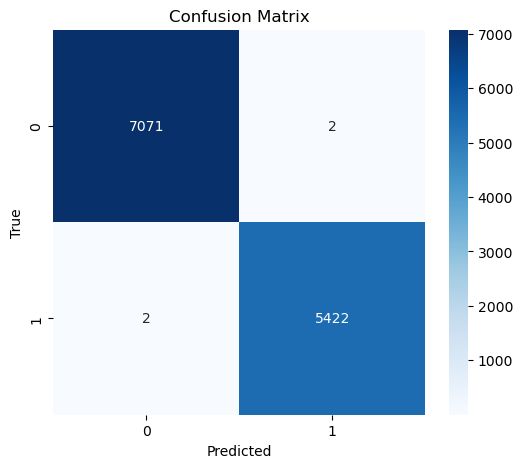

In [49]:
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()